# **Fraudulent Transaction Prediction**


1.   Amrita Bhatia [102017017]
2.   Ananya Thomas [102017024]

This project compares the performance of four machine learning models in a binary classification problem for prediction fraudulent transactions.The models compared are: 

1.   Logistic Regression
2.   Naive-Bayes
3.   K-nearest neighbours
4.   Decision tree


# Loading Dataset from Kaggle

***Please upload your Kaggle API Token***

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download vardhansiramdasu/fraudulent-transactions-prediction

 98% 174M/178M [00:03<00:00, 59.4MB/s]
100% 178M/178M [00:03<00:00, 56.0MB/s]


In [ ]:
! unzip fraudulent-transactions-prediction

Archive:  fraudulent-transactions-prediction.zip
  inflating: Fraud.csv               


# Data

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
fraud = pd.read_csv('/content/Fraud.csv')

print(fraud.shape)
print(fraud.columns)

(6362620, 11)
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [ ]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
fraud['type']= label_encoder.fit_transform(fraud['type'])

fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
fraud = fraud.drop(['step', 'nameOrig','nameDest', 'isFlaggedFraud'], axis=1)
fraud.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
fraud["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
X = fraud.iloc[:, :-1]
Y = fraud.iloc[:, -1]

In [ ]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.00,160296.36,0.00,0.00
1,3,1864.28,21249.00,19384.72,0.00,0.00
2,4,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,4,6311409.28,6311409.28,0.00,0.00,0.00
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,4,850002.52,850002.52,0.00,0.00,0.00


In [ ]:
# undersampling unbalanced dataset
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X, Y = undersample.fit_resample(X, Y)

In [ ]:
Y.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [ ]:
# splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(f"{x_train.shape} {y_train.shape}")
print(f"{x_test.shape} {y_test.shape}")

(13140, 6) (13140,)
(3286, 6) (3286,)


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
x_train = scale_X.fit_transform(x_train)
x_test = scale_X.transform(x_test)

# Models

## Logistic Regression

### Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

### Performance testing

In [ ]:
pred = log_reg.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, pred))

[[1610   21]
 [ 405 1250]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1631
           1       0.98      0.76      0.85      1655

    accuracy                           0.87      3286
   macro avg       0.89      0.87      0.87      3286
weighted avg       0.89      0.87      0.87      3286



In [ ]:
pred_train = log_reg.predict(x_train)

In [ ]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.8703590992087644
Accuracy score on training data: 0.8724505327245053


## Naive-Bayes

### Training the model

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

### Performance Testing

In [ ]:
pred = nb_classifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, pred))

[[1552   79]
 [1214  441]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.95      0.71      1631
           1       0.85      0.27      0.41      1655

    accuracy                           0.61      3286
   macro avg       0.70      0.61      0.56      3286
weighted avg       0.71      0.61      0.55      3286



In [ ]:
pred_train = nb_classifier.predict(x_train)

In [ ]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.6065124771758977
Accuracy score on training data: 0.6299086757990867


## K-Nearest Neighbors

### Finding optimal value of K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

errors = []
k_range = range(2, 51)

for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    knn_classifier.fit(x_train, y_train)
    pred = knn_classifier.predict(x_test)
    errors.append(mean_squared_error(y_test, pred))

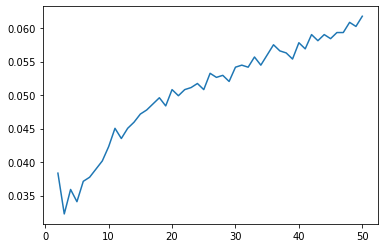

In [ ]:
plt.plot(k_range, errors)

In [ ]:
k_index = errors.index(min(errors))
K = k_range[k_index]

print(f"Value of optimal k = {K}")

Value of optimal k = 3


### Training the final K-NN model

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Performance testing

In [ ]:
pred = knn_classifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, pred))

[[1576   55]
 [  51 1604]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1631
           1       0.97      0.97      0.97      1655

    accuracy                           0.97      3286
   macro avg       0.97      0.97      0.97      3286
weighted avg       0.97      0.97      0.97      3286



In [ ]:
pred_train = knn_classifier.predict(x_train)

In [ ]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.967741935483871
Accuracy score on training data: 0.9797564687975647


## Decision Tree

### Observing change in error with change in maximum depth of DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

errors = []
depth_range = range(1, 20)

for d in depth_range:
  dt_classifier = DecisionTreeClassifier(random_state = 1, max_depth = d)
  dt_classifier.fit(x_train, y_train)
  pred = dt_classifier.predict(x_test)
  errors.append(mean_squared_error(y_test, pred))

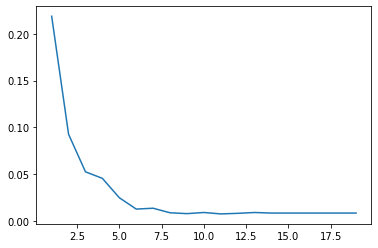

In [ ]:
plt.plot(depth_range, errors)

### Training the model

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state = 1)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

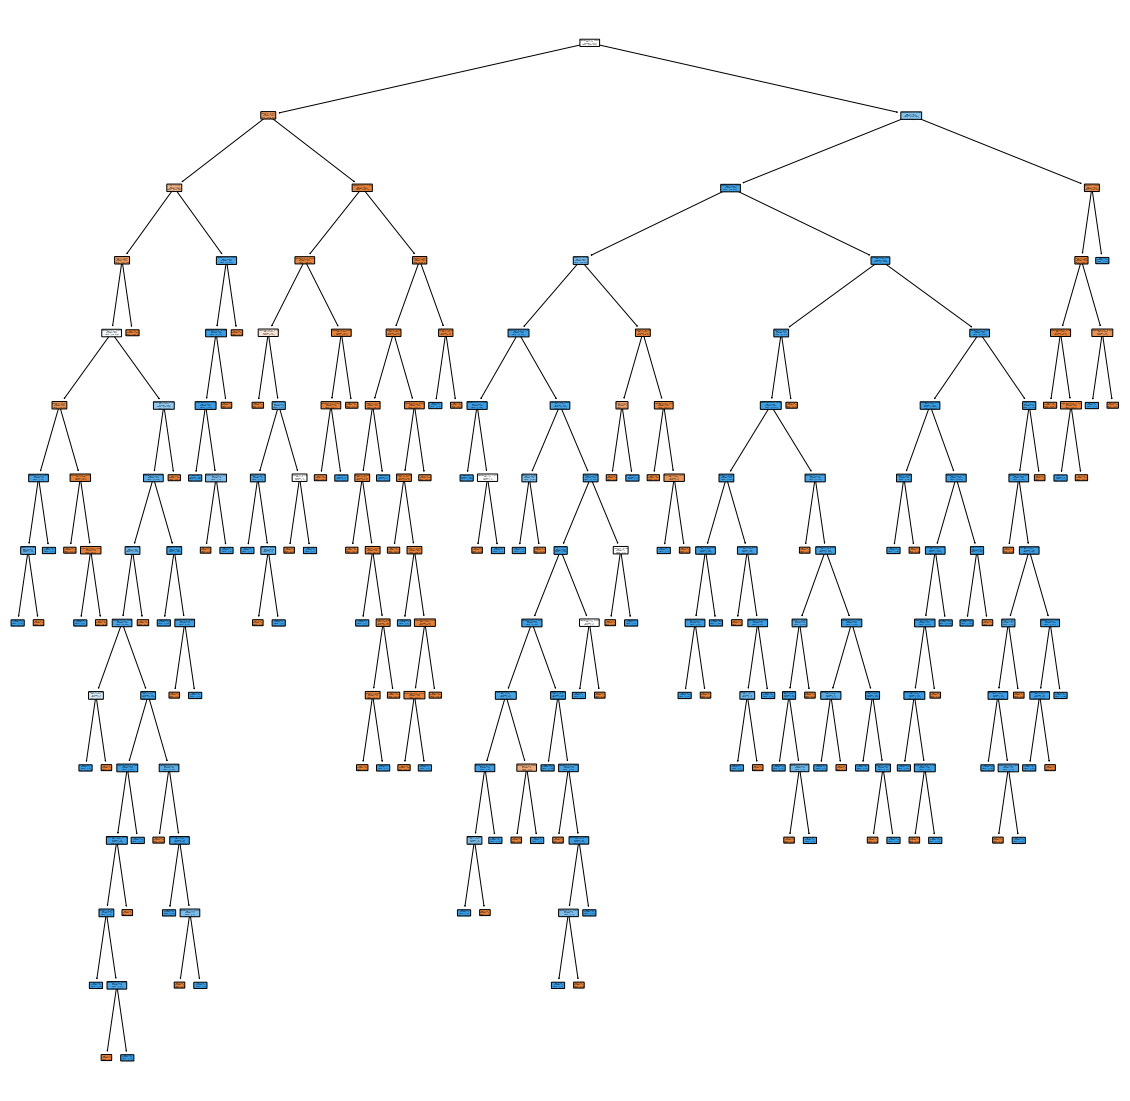

In [ ]:
plt.figure(figsize = (20, 20))
dec_tree = plot_tree(decision_tree=dt_classifier, feature_names = fraud.columns, 
                     class_names =["fraud", "not_fraud"] , filled = True , precision = 4, rounded = True)

### Performance testing

In [ ]:
pred = dt_classifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, pred))

[[1615   16]
 [  11 1644]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1631
           1       0.99      0.99      0.99      1655

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [ ]:
pred_train = dt_classifier.predict(x_train)

In [ ]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.9917833231892879
Accuracy score on training data: 1.0


# **Outcome**
On comparing the four models the accuracy of the Decison tree model is found to be the best followed by K-Nearest neighboursand then Logistic Regression. Naive Bayes is found to have the least accuracy.